In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
# load X_data numpy array
X_data = np.load('X_data.npy')

# shape: models, velocity channels (all molecules together)
print("Data shape:", X_data.shape)

Data shape: (3000, 1280)


In [ ]:
# load molecules name info
X_data_info = np.load('X_data_info.npy', allow_pickle=True)

print(X_data_info)

# determine number of channels per molecule
nchans = X_data.shape[1] // len(X_data_info)
print(nchans)

['DCO+ 01-00' 'DCO+ 03-02' 'HCN 01-00' 'HCO+ 01-00' 'HCO+ 03-02'
 'N2D+ 01-00' 'N2D+ 03-02' 'N2H+ 01-00' 'N2H+ 03-02' 'H2D+_ORTHO 01-00']
128


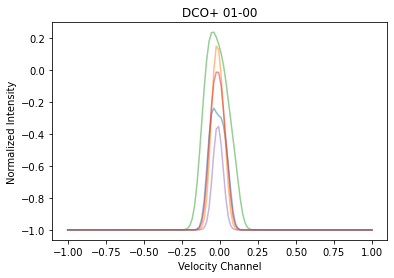

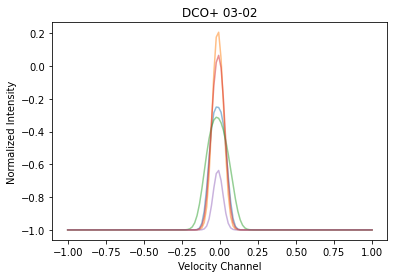

In [ ]:
# create velocity channels array (arbitrary units)
vchans = np.linspace(-1, 1, nchans)

# plot first 5 models for the first 2 molecules
for j, molecule in enumerate(X_data_info[:2]):
    plt.figure()
    plt.title(molecule)
    for i in range(5):
        plt.plot(vchans, X_data[i, j*nchans:(j+1)*nchans], alpha=0.5)
    plt.xlabel('Velocity Channel')
    plt.ylabel('Normalized Intensity')
    plt.show()

In [ ]:
# load y data
with open('y_data.pkl', 'rb') as f:
    y_data = pickle.load(f)

# convert lists to numpy arrays
y_data = {k: np.array(v) for k, v in y_data.items()}

# print shapes of y_data arrays
for key in y_data:
    print(f"{key}: shape {y_data[key].shape}")

ncore: shape (3000,)
sigma_turb: shape (3000,)
av0: shape (3000,)
time_factor: shape (3000,)
total_mass: shape (3000,)
tgas@1e4au: shape (3000,)
tdust@1e4au: shape (3000,)
C18O@1e4au: shape (3000,)
HCO+@1e4au: shape (3000,)
DCO+@1e4au: shape (3000,)
N2H+@1e4au: shape (3000,)
N2D+@1e4au: shape (3000,)
x_e-@1e4au: shape (3000,)
crate@1e4au: shape (3000,)
cr_fit_a0: shape (3000,)
cr_fit_a1: shape (3000,)
cr_fit_a2: shape (3000,)
cr_fit_a3: shape (3000,)


In [ ]:
# load y_data_info, names, units, latex symbols, etc...
with open('y_data_info.pkl', 'rb') as f:
    y_data_info = pickle.load(f)
print("y_data_info:", y_data_info)

y_data_info: (['ncore', 'sigma_turb', 'av0', 'time_factor', 'total_mass', 'tgas@1e4au', 'tdust@1e4au', 'C18O@1e4au', 'HCO+@1e4au', 'DCO+@1e4au', 'N2H+@1e4au', 'N2D+@1e4au', 'x_e-@1e4au', 'crate@1e4au', 'cr_fit_a0', 'cr_fit_a1', 'cr_fit_a2', 'cr_fit_a3'], ['ncore', 'sigma_turb', 'C18O@1e4au', 'HCO+@1e4au', 'DCO+@1e4au', 'x_e-@1e4au'], {'age': 'Myr', 'ncore': 'cm$^{-3}$', 'total_mass': 'M$_\\odot$', 'crate@weighted': 's$^{-1}$', 'crate@1e4au': 's$^{-1}$', 'sigma_turb': 'cm s$^{-1}$', 'av0': 'mag', 'time_factor': '-', 'tgas@center': 'K', 'tdust@center': 'K', 'tgas@weighted': 'K', 'tdust@weighted': 'K', 'tgas@1e4au': 'K', 'tdust@1e4au': 'K', 'e-@weighted': '-', 'N2H+@weighted': 'cm$^{-3}$', 'N2D+@weighted': 'cm$^{-3}$', 'C18O@weighted': 'cm$^{-3}$', 'HCO+@weighted': 'cm$^{-3}$', 'DCO+@weighted': 'cm$^{-3}$', 'N2H+@1e4au': 'cm$^{-3}$', 'N2D+@1e4au': 'cm$^{-3}$', 'C18O@1e4au': 'cm$^{-3}$', 'HCO+@1e4au': 'cm$^{-3}$', 'DCO+@1e4au': 'cm$^{-3}$', 'x_e-@1e4au': '-', 'cr_fit_a0': '-', 'cr_fit_a1':

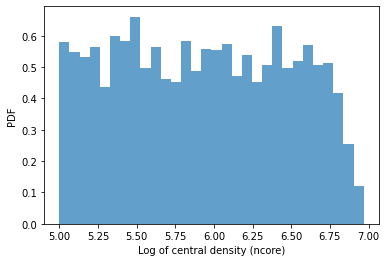

In [ ]:
# example: plot histogram of one of the y parameters
plt.hist(np.log10(y_data['ncore']), bins=30, density=True, alpha=0.7)
plt.xlabel('Log of central density (ncore)')
plt.ylabel('PDF')
plt.show()